In [2]:
import pandas as pd
import numpy as np

from pyod.models.iforest import IForest
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools

In [3]:
players = pd.read_csv('merged_players42-12.csv',index_col=0,parse_dates=['debut','finalGame'])
players.head()

,playerID,FPCT,POS,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,debut,finalGame,weight,servingDays,debutAge,inducted
0,aaronha01,0.979124,OF,3298,21.0,0.373949,3.748939,0.228927,0.072771,0.696483,0.088842,0.036689,1954-04-13,1976-10-03,180.0,8209.0,20.293151,Y
1,aaronto01,0.982705,1B,437,9.0,0.291506,2.160183,0.029748,0.020595,0.215103,0.006865,0.013730,1962-04-10,1971-09-26,190.0,3456.0,23.287671,N
2,aasedo01,0.955399,P,448,0.0,0.000000,0.011161,0.000000,0.000000,0.000000,0.000000,0.000000,1977-07-26,1990-10-03,190.0,4817.0,23.580822,N
3,abadan01,0.986486,1B,15,0.0,0.240000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-09-10,2006-04-13,184.0,1676.0,29.712329,N
4,abbotje01,0.975208,OF,233,5.0,0.307453,2.557940,0.077253,0.025751,0.356223,0.008584,0.030043,1997-06-10,2001-09-29,190.0,1572.0,25.457534,N


In [4]:
players.shape

(7927, 18)

In [5]:
players.columns

Index(['playerID', 'FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'debut', 'finalGame', 'weight', 'servingDays',
       'debutAge', 'inducted'],
      dtype='object')

servingDays are just used for filter samples when check outliers.

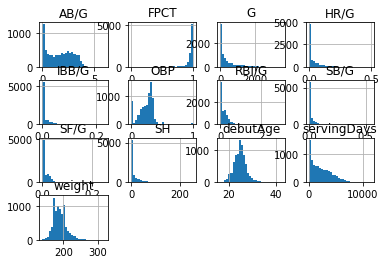

In [6]:
players.hist(bins=30)
plt.show()

In [6]:
players1 = players[players['OBP']>0]

In [15]:
features = [['G'],
            ['G','POS'],
            ['OBP'],
            ['FPCT'],
            ['FPCT','POS'],
            ['OBP','FPCT','POS'],
            ['G','OBP'],
            ['G','OBP','FPCT'],
            ['G','OBP','FPCT','POS'],
            ['G','FPCT'],
            ['G','FPCT','POS'],
            ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']]

num_list = []
for feature in features:
    X = players[feature]
    if ('POS' in feature):
        X = pd.get_dummies(X, columns = ['POS'] )
    y = players[['inducted']]
    
    clf = IForest(random_state=2018)
    clf.fit(X)
    
    outlier_scores = clf.decision_scores_
    players_pre = players[['playerID','servingDays','inducted']]
    players_pre.loc[:,'outlier_score']=outlier_scores

    player10 = players_pre[players_pre['servingDays']>2000].sort_values(['outlier_score'],ascending=False).iloc[:100,:]

    num = (player10[player10['inducted']=='Y'].shape[0])
    num_list.append([num,feature])
    print(num)

num_list

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


48


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


43


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


7


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


8


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


46


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


40


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


42


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


44


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


34
38


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[[48, ['G']],
 [43, ['G', 'POS']],
 [7, ['OBP']],
 [1, ['FPCT']],
 [0, ['FPCT', 'POS']],
 [8, ['OBP', 'FPCT', 'POS']],
 [46, ['G', 'OBP']],
 [40, ['G', 'OBP', 'FPCT']],
 [42, ['G', 'OBP', 'FPCT', 'POS']],
 [44, ['G', 'FPCT']],
 [34, ['G', 'FPCT', 'POS']],
 [38,
  ['FPCT',
   'POS',
   'G',
   'SH',
   'OBP',
   'AB/G',
   'HR/G',
   'SB/G',
   'RBI/G',
   'IBB/G',
   'SF/G',
   'weight',
   'debutAge']]]

In [16]:
num_list

[[48, ['G']],
 [43, ['G', 'POS']],
 [7, ['OBP']],
 [1, ['FPCT']],
 [0, ['FPCT', 'POS']],
 [8, ['OBP', 'FPCT', 'POS']],
 [46, ['G', 'OBP']],
 [40, ['G', 'OBP', 'FPCT']],
 [42, ['G', 'OBP', 'FPCT', 'POS']],
 [44, ['G', 'FPCT']],
 [34, ['G', 'FPCT', 'POS']],
 [38,
  ['FPCT',
   'POS',
   'G',
   'SH',
   'OBP',
   'AB/G',
   'HR/G',
   'SB/G',
   'RBI/G',
   'IBB/G',
   'SF/G',
   'weight',
   'debutAge']]]

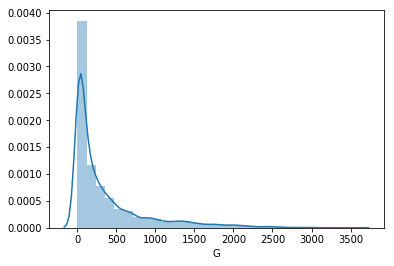

In [19]:
sns.distplot(players.G, bins=30)

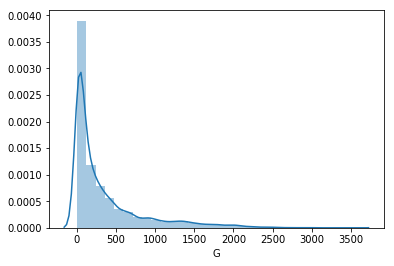

In [17]:
players_N = players[players['inducted']=='N']
sns.distplot(players_N.G, bins=30)

In [18]:
players_Y[players['G']<1000]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,playerID,FPCT,POS,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,debut,finalGame,weight,servingDays,debutAge,inducted
654,blylebe01,0.974893,P,699,56.0,0.144105,0.645207,0.000000,0.000000,0.035765,0.000000,0.000000,1970-06-05,1992-10-04,200.0,8157.0,19.438356,Y
927,brownwi02,1.000000,OF,21,0.0,0.179104,3.190476,0.047619,0.095238,0.285714,0.000000,0.000000,1947-07-19,1947-08-17,200.0,29.0,32.567123,Y
988,bunniji01,0.962680,P,601,85.0,0.188450,2.121464,0.011647,0.000000,0.124792,0.000000,0.009983,1955-07-20,1971-09-03,190.0,5889.0,24.564384,Y
1157,carltst01,0.964966,P,745,94.0,0.222658,2.307383,0.017450,0.002685,0.187919,0.000000,0.017450,1965-04-12,1988-04-23,210.0,8412.0,21.293151,Y
1954,drysddo01,0.939506,P,547,69.0,0.228226,2.137112,0.053016,0.000000,0.206581,0.000000,0.010969,1956-04-17,1969-08-05,190.0,4858.0,20.306849,Y
2230,fingero01,0.965527,P,945,18.0,0.185792,0.190476,0.002116,0.000000,0.009524,0.000000,0.000000,1968-09-15,1985-09-17,190.0,6211.0,22.720548,Y
2304,fordwh01,0.961718,P,500,65.0,0.256343,2.046000,0.006000,0.006000,0.138000,0.000000,0.008000,1950-07-01,1967-05-21,178.0,6168.0,22.512329,Y
2543,gibsobo01,0.947096,P,596,72.0,0.243472,2.228188,0.040268,0.021812,0.241611,0.000000,0.030201,1959-04-15,1975-09-03,189.0,5985.0,24.301370,Y
2593,glavito02,0.975662,P,709,216.0,0.244227,1.866008,0.001410,0.001410,0.126939,0.000000,0.004231,1987-08-17,2008-08-14,175.0,7668.0,21.638356,Y
3365,hunteca01,0.958881,P,515,39.0,0.233979,1.277670,0.011650,0.003883,0.099029,0.000000,0.009709,1965-05-13,1979-09-17,190.0,5240.0,19.375342,Y


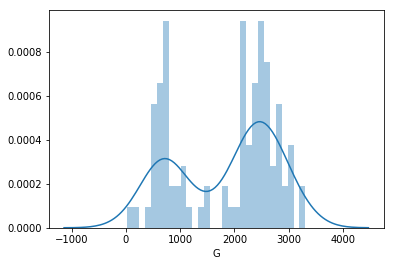

In [10]:
players_Y = players[players['inducted']=='Y']
sns.distplot(players_Y.G, bins=30)

In [33]:
feature0 = ['G']
feature1 = ['G','OBP']
feature2 = ['G','OBP','FPCT']
feature3 = ['G','OBP','FPCT','POS']
feature5 = ['G','FPCT']
feature6 = ['G','FPCT','POS']

feature4 = ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']

In [148]:
X = players[['FPCT']]
# X = pd.get_dummies(X, columns = ['POS'] )
y = players[['inducted']]

In [149]:
clf = IForest(random_state=2018)
clf.fit(X)

IForest(bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=2018,
    verbose=0)

In [150]:
clf

IForest(bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=2018,
    verbose=0)

In [151]:
outlier_scores = clf.decision_scores_
players_pre = players[['playerID','servingDays','inducted']]
players_pre.loc[:,'outlier_score']=outlier_scores

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [152]:
player10 = players_pre[players_pre['servingDays']>2000].sort_values(['outlier_score'],ascending=False).iloc[:100,:]


In [153]:
num = (player10[player10['inducted']=='Y'].shape[0])

In [154]:
num

1

In [155]:
players.inducted.value_counts()

N    7829
Y      97
Name: inducted, dtype: int64